In [14]:
import numpy as np
import pandas as pd

# data = pd.read_csv('../Documents/data_set/New_Data_Set/1.14MHz Data/Result/Features/Overall/car_human_pillar_wall_overall.csv')
car_data = pd.read_csv('../../data/features/1MHz/car.csv')
human_data = pd.read_csv('../../data/features/1MHz/human.csv')
pillar_data = pd.read_csv('../../data/features/1MHz/pillar.csv')
wall_data = pd.read_csv('../../data/features/1MHz/wall.csv')
human = human_data.loc[human_data['type'] == 'HUMAN'].iloc[:,4:]
car = car_data.loc[car_data['type'] == 'CAR'].iloc[:,4:]
pillar = pillar_data.loc[pillar_data['type'] == 'PILLAR'].iloc[:,4:]
wall = wall_data.loc[wall_data['type'] == 'WALL'].iloc[:,4:]

In [15]:
human_label = ['HUMAN']*human.shape[0]
car_label = ['CAR']*car.shape[0]
wall_label = ['WALL']*wall.shape[0]
pillar_label = ['PILLAR']*pillar.shape[0]
non_human_label = ['NON_HUMAN']*(car.shape[0] +wall.shape[0] + pillar.shape[0])
human.shape, car.shape, pillar.shape, wall.shape

((11546, 36), (9383, 36), (5820, 36), (5556, 36))

In [23]:
label = human_label + non_human_label
from sklearn.model_selection import train_test_split

data = human.values.tolist() + car.values.tolist() + wall.values.tolist() + pillar.values.tolist()
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.4, random_state=42)

In [24]:
from sklearn import preprocessing
def custom_normalization(X_set):
    new_X_set = []
    for X in X_set:
        min = np.min(X)
        max = np.max(X)
        value = max - min
        data_set = []
        for data in X:
           data_set.append(((data - min) / value) + 0)
        new_X_set.append(data_set)
    return new_X_set

normalized_X_Human_Non_Human_train = custom_normalization(X_train)
normalized_X_Human_Non_Human_test = custom_normalization(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

def create_confusion_matrix(y_test, result, labels = ['HUMAN', 'NON_HUMAN']):
    cm = confusion_matrix(y_test, result)
    import seaborn as sns
    import matplotlib.pyplot as plt     
    sum = np.sum(cm, axis=1)
    score = accuracy_score(y_test, result)
    print(score)
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    precision_CLASS_A = round(precision_score(y_test, result, average='binary',pos_label=labels[0]),2)
    precision_CLASS_B = round(precision_score(y_test, result, average='binary',pos_label=labels[1]),2)
    recall_CLASS_A = round(recall_score(y_test, result, average='binary',pos_label=labels[0]),2)
    recall_CLASS_B = round(recall_score(y_test, result, average='binary',pos_label=labels[1]),2)
    f1_CLASS_A = round(f1_score(y_test, result, average='binary',pos_label=labels[0]),2)
    f1_CLASS_B = round(f1_score(y_test, result, average='binary',pos_label=labels[1]),2)
    f1_average = round((f1_CLASS_A + f1_CLASS_B)/2, 2);
    print('Precision: Class A',precision_CLASS_A)
    print('Precision: Class B',precision_CLASS_B)
    print('Recall: Class A',recall_CLASS_A)
    print('Recall: Class B',recall_CLASS_B)
    print('F1-Score: Class A',f1_CLASS_A)
    print('F1-Score: Class B',f1_CLASS_B)
    print('Average F1-score:', f1_average)
        
    cm_new = np.append(cm[0], recall_CLASS_A)
    cm_new2 = np.append(cm[1], recall_CLASS_B)
    cm_new3 = np.array([precision_CLASS_A, precision_CLASS_B, score])
    cm = np.array([cm_new,cm_new2,cm_new3])
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Reds"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Multilayer Perceptron'); 
    counter = 0
    for i in range(0,2):
        for j in range(0,3):
            percentage = cm[i][j]/sum[i]
            t = ax.texts[counter]
            if j == 2:
                t.set_text(str(cm[i][j]))
            else:
                t.set_text(str(cm[i][j]) + '\n' + str(round(percentage*100,2)) + " %")
            counter = counter + 1
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels);

0.9630088221637517
Precision: Class A 0.97
Precision: Class B 0.96
Recall: Class A 0.93
Recall: Class B 0.98
F1-Score: Class A 0.95
F1-Score: Class B 0.97
Average F1-score: 0.96


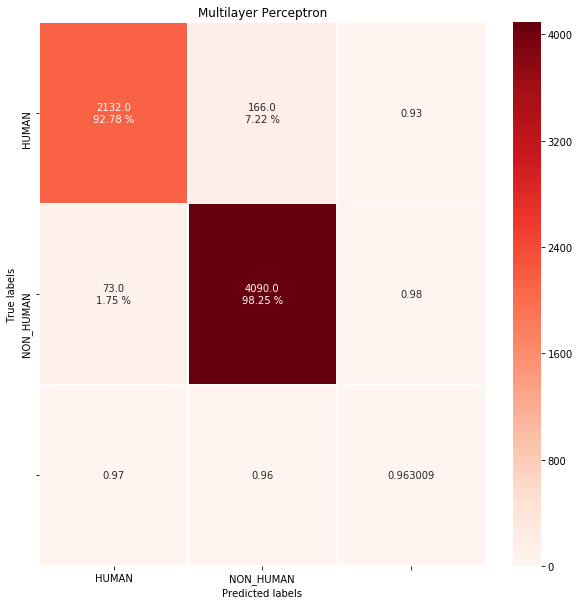

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(43), random_state=12)
clf.fit(normalized_X_Human_Non_Human_train, y_train)
result = clf.predict(normalized_X_Human_Non_Human_test)
create_confusion_matrix(y_test, result)

In [32]:
for i in range(10,90):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(i), random_state=12)
    scores = cross_val_score(clf, normalized_X_Human_Non_Human_train, y_train, cv=3, scoring="accuracy")
    print("hidden layer", i, "score average", scores.mean())

hidden layer 10 score average 0.9414951693363344
hidden layer 11 score average 0.9353814238703945
hidden layer 12 score average 0.9421141502652643
hidden layer 13 score average 0.9462542385009165
hidden layer 14 score average 0.9509363409941112
hidden layer 15 score average 0.9355361881926972
hidden layer 16 score average 0.9449389685962956
hidden layer 17 score average 0.93530403047979
hidden layer 18 score average 0.9363874615879713
hidden layer 19 score average 0.9421527391578172
hidden layer 20 score average 0.9452095579894123
hidden layer 21 score average 0.9492334528281895
hidden layer 22 score average 0.9460998514882372
hidden layer 23 score average 0.9600680019744073
hidden layer 24 score average 0.9543027019456555
hidden layer 25 score average 0.9436232405299889
hidden layer 26 score average 0.9561599726324753
hidden layer 27 score average 0.9466026704627608
hidden layer 28 score average 0.9488467643656034
hidden layer 29 score average 0.9479569155531204
hidden layer 30 score 

KeyboardInterrupt: 

0.9408760253830676
Precision: Class A 0.94
Precision: Class B 0.94
Recall: Class A 0.89
Recall: Class B 0.97
F1-Score: Class A 0.91
F1-Score: Class B 0.95
Average F1-score: 0.93


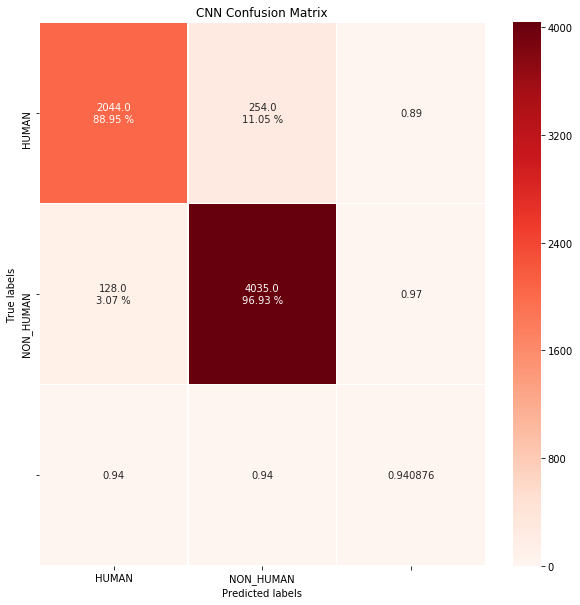

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15), random_state=12)
clf.fit(normalized_X_Human_Non_Human_train, y_train)
result = clf.predict(normalized_X_Human_Non_Human_test)
create_confusion_matrix(y_test, result)

0.9787958520352886
Precision: Class A 0.99
Precision: Class B 0.97
Recall: Class A 0.95
Recall: Class B 0.99
F1-Score: Class A 0.97
F1-Score: Class B 0.98
Average F1-score: 0.98


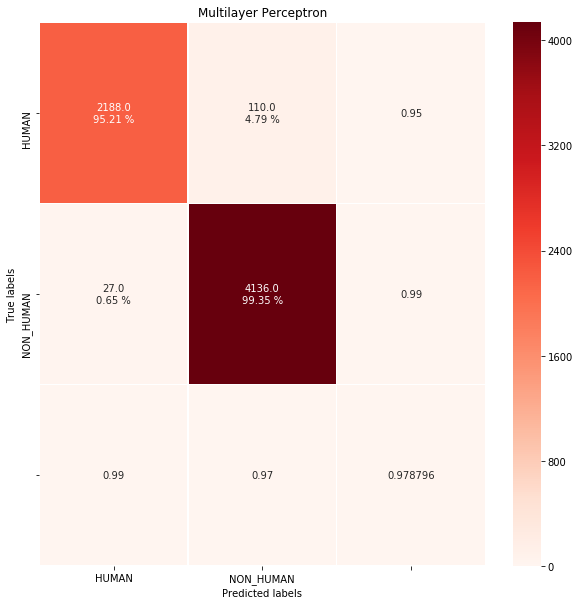

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(13,19,12), random_state=12, max_iter=3000)
clf.fit(normalized_X_Human_Non_Human_train, y_train)
result = clf.predict(normalized_X_Human_Non_Human_test)
create_confusion_matrix(y_test, result)

0.96943197647423
Precision: Class A 0.97
Precision: Class B 0.97
Recall: Class A 0.94
Recall: Class B 0.98
F1-Score: Class A 0.96
F1-Score: Class B 0.98
Average F1-score: 0.97


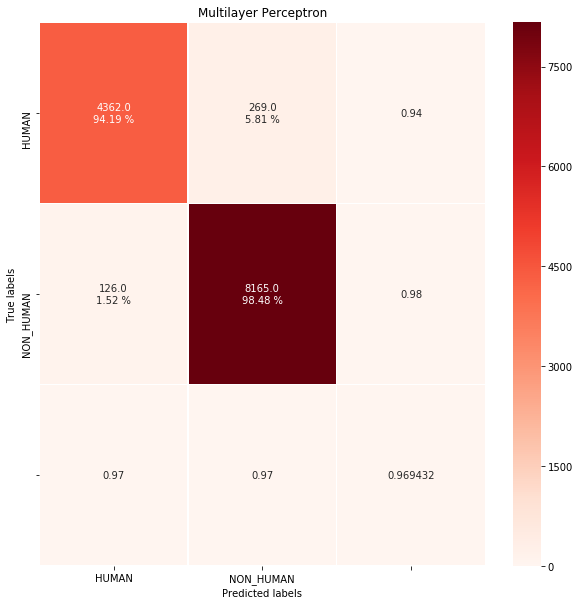

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(13,19,12), random_state=12, max_iter=3000)
clf.fit(normalized_X_Human_Non_Human_train, y_train)
result = clf.predict(normalized_X_Human_Non_Human_test)
create_confusion_matrix(y_test, result)